In [2]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [4]:
path = '/content/gdrive/MyDrive/CP01-RCNN'
os.chdir(path)

In [5]:
!unzip imag.zip

Archive:  imag.zip
replace __MACOSX/._imag? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._imag         
  inflating: imag/000387.jpg         
  inflating: __MACOSX/imag/._000387.jpg  
  inflating: imag/052775.jpg         
  inflating: __MACOSX/imag/._052775.jpg  
  inflating: imag/000386.jpg         
  inflating: __MACOSX/imag/._000386.jpg  
  inflating: imag/000379.jpg         
  inflating: __MACOSX/imag/._000379.jpg  
  inflating: imag/001259.jpg         
  inflating: __MACOSX/imag/._001259.jpg  
  inflating: imag/001299.jpg         
  inflating: __MACOSX/imag/._001299.jpg  
  inflating: imag/001266.jpg         
  inflating: __MACOSX/imag/._001266.jpg  
  inflating: imag/.DS_Store          
  inflating: __MACOSX/imag/._.DS_Store  
  inflating: imag/000369.jpg         
  inflating: __MACOSX/imag/._000369.jpg  
  inflating: imag/001300.jpg         
  inflating: __MACOSX/imag/._001300.jpg  
  inflating: imag/000309.jpg         
  inflating: __MACOSX/imag/._000309.jpg  

In [6]:
!unzip annot.zip

Archive:  annot.zip
replace annot/000387.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: annot/000387.json       
  inflating: __MACOSX/annot/._000387.json  
  inflating: annot/000372.json       
  inflating: __MACOSX/annot/._000372.json  
  inflating: annot/052681.json       
  inflating: __MACOSX/annot/._052681.json  
  inflating: annot/000309.json       
  inflating: __MACOSX/annot/._000309.json  
  inflating: annot/001236.json       
  inflating: __MACOSX/annot/._001236.json  
  inflating: annot/001237.json       
  inflating: __MACOSX/annot/._001237.json  
  inflating: annot/052710.json       
  inflating: __MACOSX/annot/._052710.json  
  inflating: annot/000308.json       
  inflating: __MACOSX/annot/._000308.json  
  inflating: annot/001299.json       
  inflating: __MACOSX/annot/._001299.json  
  inflating: annot/.DS_Store         
  inflating: __MACOSX/annot/._.DS_Store  
  inflating: annot/000109.json       
  inflating: __MACOSX/annot/._000109.json  
  inflating: 

In [7]:
path = "imag"
annot = "annot"

000109.jpg


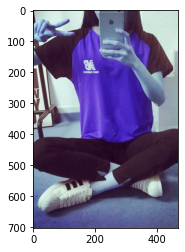

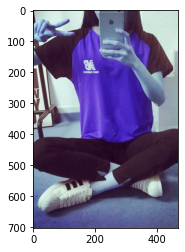

In [8]:
for e,i in enumerate(os.listdir(annot)):# annotations 파일 목록에 인덱스와 변수를 분리해서 반환해 준다. 
    if e < 10:  # 인덱스를 뜻  한다. 
        filename = i.split(".")[0]+".jpg" # 변수(파일이름)을 . 단위로 나눈 뒤 0번째 있는 변수에 .jpg 를 더한다.
        print(filename) # 파일이름을 프린트한다.
        img = cv2.imread(os.path.join(path,filename)) #cv2.imread는 이미지를 읽는 기능이다.
        df = pd.read_csv(os.path.join(annot,i)) # 데이터프레임을 만든다. csv 파일을 불러온다.
        plt.imshow(img)
        for row in df.iterrows(): # 인덱스 열-행 순서로 정리를 해준다. 예) row1(인덱스) = col(열이름)0번째, value(행)1번째
            x1 = int(row[1][0].split(" ")[0]) # row가 value가 앞에 col이 뒤로 가는 구조로 바뀌었고 다시 빈칸으로 나눈 다음 0 째 행에 있는 값을 반환. 
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2) # annotation을 이용하여 사각형 그리기 rectangle 맨뒤의 숫자가 정수이면 테두리 -1이면 채우기가 됨.
        plt.figure()
        plt.imshow(img)
        break

In [9]:
cv2.setUseOptimized(True); # cv2.useOptimized()를 사용하여 활성화 / 비활성화되어 있는지 확인하고 cv2.setUseOptimized()를 사용하여 활성화 / 비활성화 할 수 있습니다.
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation() # selective search class 선언, class 만들기

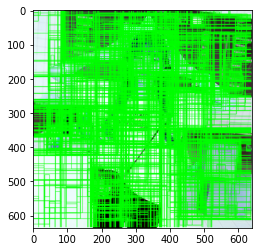

In [10]:
im = cv2.imread(os.path.join(path,"000387.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast() # selective search 를 빨리 하는 파라미터
rects = ss.process() # 실행
imOut = im.copy() # 이미지 복사
for i, rect in (enumerate(rects)): # 인덱스로 분류된  열 행 순서로 나열
    x, y, w, h = rect # x는 센터x, y는 센터y, with, height
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h] #
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [11]:
train_images=[] # 사진
train_labels=[] # annotation 

In [12]:
def get_iou(bb1, bb2): # iou 모델이 bounding box를 얼마나 정확하게 찾는지 확인.
    assert bb1['x1'] < bb1['x2'] # 왼쪽 x의 좌표값이 오른쪽 x의 좌표값보다 작은지 확인.즉 제대로 bounding 좌표가 맞는지 확인한다.
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']
# 올바르게 bounding 값이 들어갔다면 계산을 시작한다.

# 박스를 가장 크게 그린다.
    x_left = max(bb1['x1'], bb2['x1']) # bb1은 annotation, bb2는 모델이 정한 box. 이중 가장 큰 값을 찾는다.
    y_top = max(bb1['y1'], bb2['y1'])  # height 값을 찾기 위해 가장 큰 값을 찾는다. 
    x_right = min(bb1['x2'], bb2['x2']) # 오른쪽 x 값을 선정한다. 
    y_bottom = min(bb1['y2'], bb2['y2']) # bottom 값을 찾는다. 

    if x_right < x_left or y_bottom < y_top: # 오른쪽 x 값이 크다면 혹은 bottom 이 top 보다 크다면 잘못된 것.
        return 0.0 # 0을 반환한다. 

    intersection_area = (x_right - x_left) * (y_bottom - y_top) # bb1과 bb2가 겹치는 부분을 계산

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1']) # bb1의 영역 계산
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1']) # bb2의 영역 계산

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area) # iou 계산.
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [13]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation() # selective search를 class를 만든다. 

In [14]:
for e,i in enumerate(os.listdir(annot)): # annotation 폴더의 경로로 들어가 인덱스 리스트의 변수 형태의 리스트로 가져온다
    try: 
        if i.startswith("0"): # i 는 열 - 행 
            filename = i.split(".")[0]+".jpg" # 열에 있는 이름에서 '.'을 기준으로 나눈 결과값중 0번째 있는 값을 가져와 .jpg를 붙인다.
            print(e,filename) # e 는 인덱스
            image = cv2.imread(os.path.join(path,filename)) # join으로 경로와 filename을 합쳐 학습할 데이터를 불러온다. # imread로 이미지를 읽는다.
            df = pd.read_csv(os.path.join(annot,i)) # annot 와 i(열 행)을 합친 이름으로 경로로 들어가 csv annotation 파일을 불러온다.
            gtvalues=[] # 리스트 만들기
            for row in df.iterrows(): #데이터의 행-열/데이터 정보를 튜플 형태의 generator 객체로 반환하는 메서드입니다.
                # annotation 에서 필요한 값 찾기
                x1 = int(row[1][0].split(" ")[0]) # 열
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2}) #리스트에 추가
            ss.setBaseImage(image)    # 이미지가 switch 형태의 function을 사용할 수 있도록 set 한다.
            ss.switchToSelectiveSearchFast() # selective search를 더 빠르게 검색할 수 있도록 한다.
            ssresults = ss.process() # selective search 를 실행한다. 
            imout = image.copy() # 이미지를 복사한다.
            counter = 0 # 숫자 세기
            falsecounter = 0 # 숫자 세기
            flag = 0 
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults): # 결과값을 인덱스 데이터(4개의 데이터 박스 위치 정보값)로 반환한다. 
                if e < 2000 and flag == 0: # e 인덱스 값이 2000보다 작고 flag 즉 label 이 0 이라면,
                    for gtval in gtvalues: # annotation 의 값으로 만든 리스트를 불러온다. # label
                        x,y,w,h = result # selective search를 통해 얻은 값.
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h}) # 실제 bb와 비표한다. iou값을 계산하여 얼마나 정확하게 사물을 포착했는 지 계산한다.
                        # 제대로 포착한 bb
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 000109.jpg
1 000110.jpg
2 000309.jpg
3 000311.jpg
4 000310.jpg
5 000308.jpg
6 000389.jpg
7 000376.jpg
8 000369.jpg
9 000387.jpg
10 000372.jpg
11 000386.jpg
12 000379.jpg
13 001237.jpg
14 001268.jpg
15 001234.jpg
16 001259.jpg
17 001235.jpg
18 001236.jpg
19 001266.jpg
20 001299.jpg
21 001279.jpg
22 001280.jpg
23 001300.jpg
24 052682.jpg
25 052710.jpg
26 052681.jpg
27 052708.jpg
28 052778.jpg
29 052775.jpg


In [44]:
train_images

[]

In [15]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [42]:
y_new

array([], dtype=float64)

In [43]:
X_new

array([], dtype=float64)

In [17]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [18]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()

553476096/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [19]:
for layers in (vggmodel.layers)[:15]:
    print(layers)
    layers.trainable = False

In [20]:
X= vggmodel.layers[-2].output # 뒤에 있는 레이어를 출력 레이어로 사용한다. 

In [21]:
predictions = Dense(2, activation="softmax")(X) # X의 레이어를 받아와서 예상에 사용한다.

In [22]:
model_final= tf.keras.models.Model(vggmodel.input, predictions)

In [23]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [25]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [37]:
class MyLabelBinarizer(LabelBinarizer):

    def transform(self, y_new):
        Y = super().transform(y_new) # 클래스 상속 # LabelBinarizer 를 사용해서 transform 함수를 만든뒤 사용 하고 y_type function을 사용했다.
        if self.y_type_ == 'binary':  # y_type function은 target의 type을 변환해 주는 함수.
            return np.hstack((Y, 1-Y)) # numpy height stack 으로 쌓는 다. 
        else:
            return Y
    def inverse_transform(self, Y, threshold=None): # binary의 임계점은 0.5이지만 이 함수로 다시 정한다. 
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)# Y 데이터의 0번째 열의 값으로 임계점을 정한다.
        else:
            return super().inverse_transform(Y, threshold)

In [39]:
lenc = MyLabelBinarizer() # class 선언
Y = lenc.fit_transform(y_new) # 라벨에 적용 y_new 데이터에 적용하여 타겟 라벨을 만든다. 

ValueError: ignored

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10) # 데이터를 나눈다.

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

In [ ]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [ ]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

In [ ]:
im = X_test[25]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("plane")
else:
    print("not plane")

In [ ]:
z=0
for e,i in enumerate(os.listdir(path)):
    if i.startswith("0"):
        z += 1
        img = cv2.imread(os.path.join(path,i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()
        for e,result in enumerate(ssresults):
            if e < 2000:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                out= model_final.predict(img)
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
        plt.figure()
        plt.imshow(imout)